In [1]:
import numpy as np;
%matplotlib inline
import matplotlib.pyplot as plt

SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
from qiskit import *

pi = np.pi
shots = 8192

qr = QuantumRegister(4)
qc = QuantumCircuit(qr)

In [3]:
#######################
######## init #########
#######################
qc.h(qr[0])
qc.h(qr[1])
qc.h(qr[2])
qc.h(qr[3])

In [4]:
qc.barrier()
#######################
### Oracle for 0100 ###
#######################
qc.x(qr[0])
qc.x(qr[2])
qc.x(qr[3])
qc.cu1(pi/4, qr[0], qr[3])
qc.cx(qr[0], qr[1])
qc.cu1(-pi/4, qr[1], qr[3])
qc.cx(qr[0], qr[1])
qc.cu1(pi/4, qr[1], qr[3])
qc.cx(qr[1], qr[2])
qc.cu1(-pi/4, qr[2], qr[3])
qc.cx(qr[0], qr[2])
qc.cu1(pi/4, qr[2], qr[3])
qc.cx(qr[1], qr[2])
qc.cu1(-pi/4, qr[2], qr[3])
qc.cx(qr[0], qr[2])
qc.cu1(pi/4, qr[2], qr[3])
qc.x(qr[0])
qc.x(qr[2])
qc.x(qr[3])

qc.barrier()

In [5]:
#######################
#### Amplification ####
#######################
qc.h(qr[0])
qc.h(qr[1])
qc.h(qr[2])
qc.h(qr[3])
qc.x(qr[0])
qc.x(qr[1])
qc.x(qr[2])
qc.x(qr[3])

In [6]:
######## cccZ #########
qc.cu1(pi/4, qr[0], qr[3])
qc.cx(qr[0], qr[1])
qc.cu1(-pi/4, qr[1], qr[3])
qc.cx(qr[0], qr[1])
qc.cu1(pi/4, qr[1], qr[3])
qc.cx(qr[1], qr[2])
qc.cu1(-pi/4, qr[2], qr[3])
qc.cx(qr[0], qr[2])
qc.cu1(pi/4, qr[2], qr[3])
qc.cx(qr[1], qr[2])
qc.cu1(-pi/4, qr[2], qr[3])
qc.cx(qr[0], qr[2])
qc.cu1(pi/4, qr[2], qr[3])
####### end cccZ #######

In [7]:
qc.x(qr[0])
qc.x(qr[1])
qc.x(qr[2])
qc.x(qr[3])
qc.h(qr[0])
qc.h(qr[1])
qc.h(qr[2])
qc.h(qr[3])

#qc.barrier()

In [8]:
########################
####### Measure ########
########################
# qc.barrier(qr)
# qc.measure(qr[0], cr[0])
# qc.measure(qr[1], cr[1])
# qc.measure(qr[2], cr[2])
# qc.measure(qr[3], cr[3])

qc.draw()

In [9]:
cr = ClassicalRegister(4)
qc += QuantumCircuit(cr)

In [10]:
qc.measure(qr,cr,basis='Ensemble',add_param='Z')
backend = BasicAer.get_backend('dm_simulator')
# Noise parameters
options = {}
options1 = {
    "thermal_factor": 0.,
    "decoherence_factor": .9,
    "depolarization_factor": 0.99,
    "bell_depolarization_factor": 0.99,
    "decay_factor": 0.99,
    "rotation_error": {'rx':[1., 0.], 'ry':[1., 0.], 'rz': [1., 0.]},
    "tsp_model_error": [1., 0.],
    "plot": False
}
# Execution with and without noise
run = execute(qc,backend,**options)
result = run.result()
run_error = execute(qc,backend,**options1)
##fix 
##<<<START>>>
result_error = run_error.result()
##<<<END>>>
# Final state (probabilities)
prob = result['results'][0]['data']['ensemble_probability']
prob1 = result_error['results'][0]['data']['ensemble_probability']

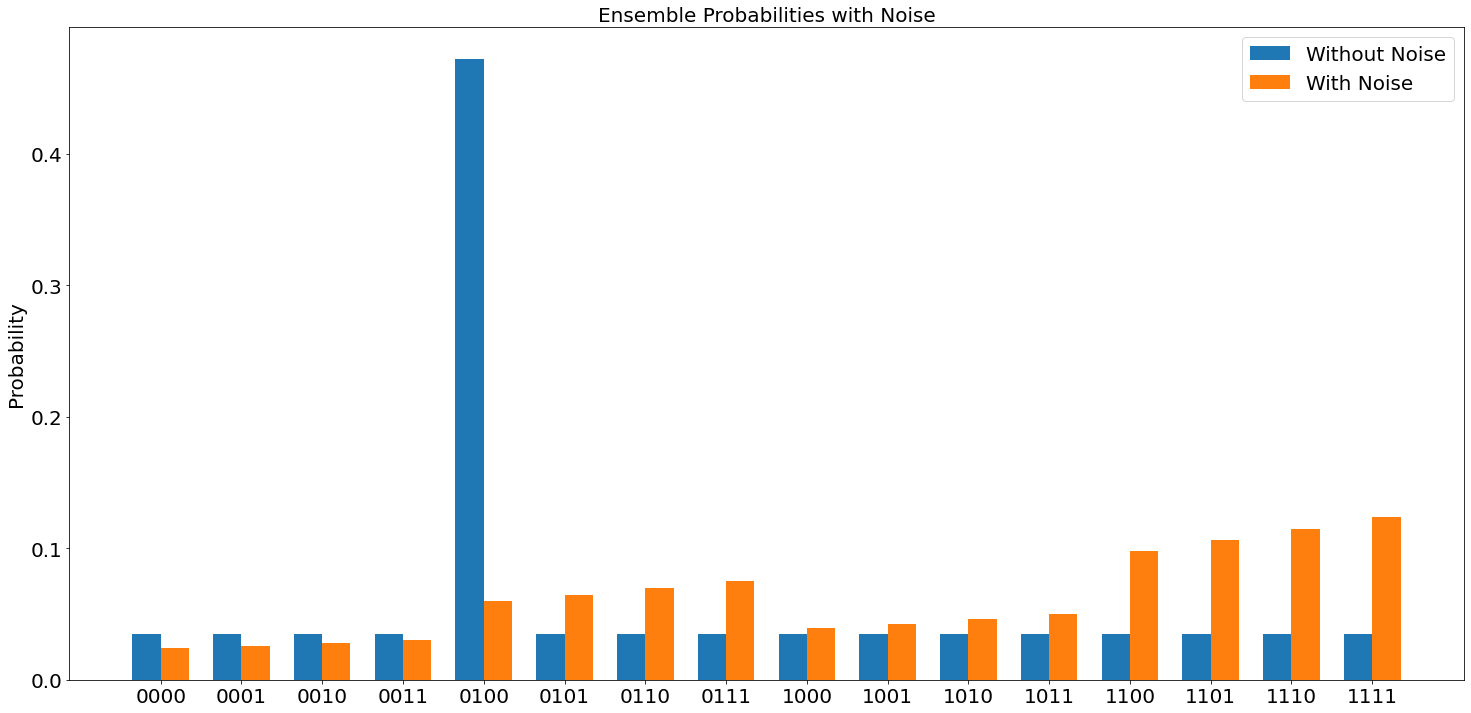

In [11]:
labels = prob1.keys()
without_noise = prob.values()
with_noise = prob1.values()

x = np.arange(len(labels)) # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(25, 12))
rects1 = ax.bar(x - width/2, without_noise, width, label='Without Noise')
rects2 = ax.bar(x + width/2, with_noise, width, label='With Noise')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Probability')
ax.set_title('Ensemble Probabilities with Noise')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()